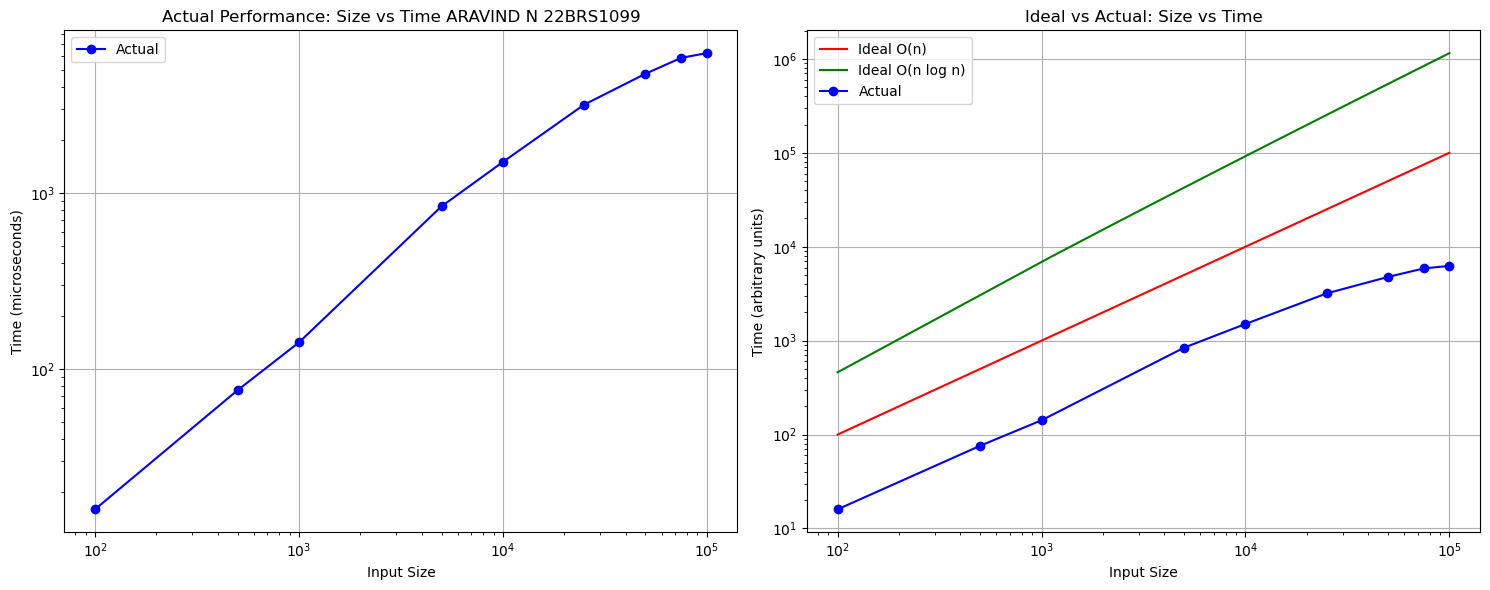

Approximate experimental time complexity: O(n^0.89)
R-squared for linear fit: 0.9309
R-squared for n log n fit: 0.9135


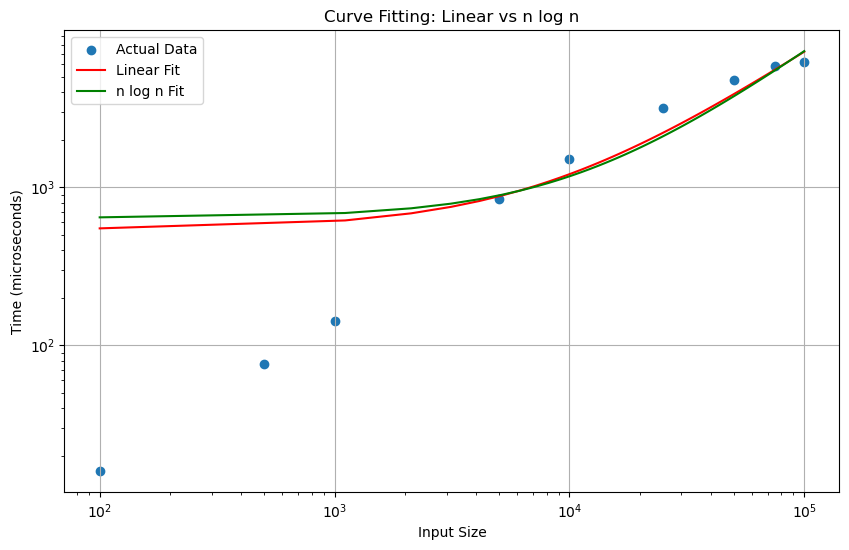

Average ratio (Time / n): 0.1263
Average ratio (Time / (n log n)): 0.0166


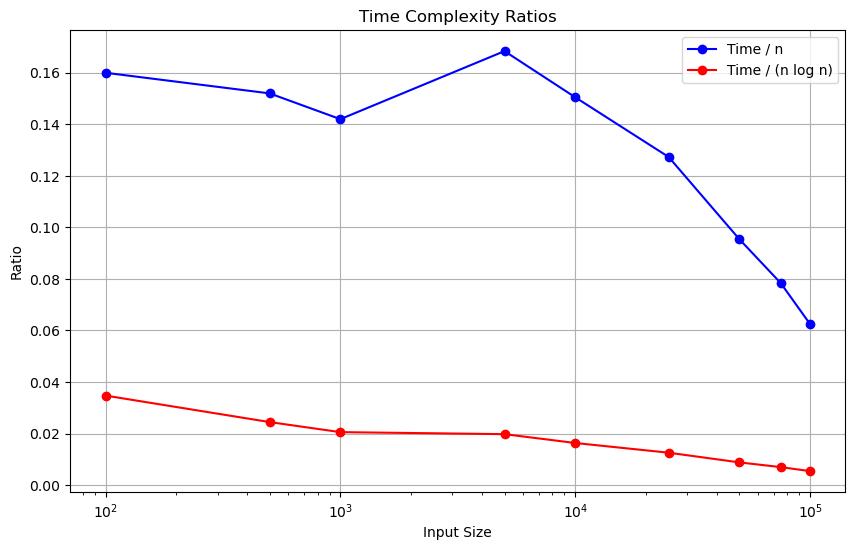

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the CSV file
df = pd.read_csv('results_maxvalidsubarray_divideconquer.csv')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual Data
ax1.plot(df['Size'], df['Time (microseconds)'], 'b-', marker='o', label='Actual')
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Time (microseconds)')
ax1.set_title('Actual Performance: Size vs Time ARAVIND N 22BRS1099')
ax1.legend()
ax1.grid(True)

# Use log scale for better visualization
ax1.set_xscale('log')
ax1.set_yscale('log')

# Plot 2: Idealistic Comparison
# Generate points for ideal O(n) and O(n log n) complexities
x = np.linspace(min(df['Size']), max(df['Size']), 100)
y_n = x  # For O(n)
y_nlogn = x * np.log(x)  # For O(n log n)

ax2.plot(x, y_n, 'r-', label='Ideal O(n)')
ax2.plot(x, y_nlogn, 'g-', label='Ideal O(n log n)')
ax2.plot(df['Size'], df['Time (microseconds)'], 'b-', marker='o', label='Actual')
ax2.set_xlabel('Input Size')
ax2.set_ylabel('Time (arbitrary units)')
ax2.set_title('Ideal vs Actual: Size vs Time')
ax2.legend()
ax2.grid(True)

# Use log scale for better visualization
ax2.set_xscale('log')
ax2.set_yscale('log')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Calculate and print the slope of the actual data (in log-log scale)
log_size = np.log(df['Size'])
log_time = np.log(df['Time (microseconds)'])
slope, _ = np.polyfit(log_size, log_time, 1)
print(f"Approximate experimental time complexity: O(n^{slope:.2f})")

# Define functions for curve fitting
def linear(x, a, b):
    return a * x + b

def nlogn(x, a, b):
    return a * x * np.log(x) + b

# Perform curve fitting
popt_linear, _ = curve_fit(linear, df['Size'], df['Time (microseconds)'])
popt_nlogn, _ = curve_fit(nlogn, df['Size'], df['Time (microseconds)'])

# Calculate R-squared values
residuals_linear = df['Time (microseconds)'] - linear(df['Size'], *popt_linear)
ss_res_linear = np.sum(residuals_linear**2)
ss_tot = np.sum((df['Time (microseconds)'] - np.mean(df['Time (microseconds)']))**2)
r_squared_linear = 1 - (ss_res_linear / ss_tot)

residuals_nlogn = df['Time (microseconds)'] - nlogn(df['Size'], *popt_nlogn)
ss_res_nlogn = np.sum(residuals_nlogn**2)
r_squared_nlogn = 1 - (ss_res_nlogn / ss_tot)

print(f"R-squared for linear fit: {r_squared_linear:.4f}")
print(f"R-squared for n log n fit: {r_squared_nlogn:.4f}")

# Plot the fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Time (microseconds)'], label='Actual Data')
plt.plot(x, linear(x, *popt_linear), 'r-', label='Linear Fit')
plt.plot(x, nlogn(x, *popt_nlogn), 'g-', label='n log n Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Time (microseconds)')
plt.title('Curve Fitting: Linear vs n log n')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the ratios
ratio_n = df['Time (microseconds)'] / df['Size']
ratio_nlogn = df['Time (microseconds)'] / (df['Size'] * np.log(df['Size']))

print(f"Average ratio (Time / n): {np.mean(ratio_n):.4f}")
print(f"Average ratio (Time / (n log n)): {np.mean(ratio_nlogn):.4f}")

# Plot the ratios
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], ratio_n, 'b-', marker='o', label='Time / n')
plt.plot(df['Size'], ratio_nlogn, 'r-', marker='o', label='Time / (n log n)')
plt.xscale('log')
plt.xlabel('Input Size')
plt.ylabel('Ratio')
plt.title('Time Complexity Ratios')
plt.legend()
plt.grid(True)
plt.show()